# **Prediksi Risiko Penyakit Paru Menggunakan Random Forest**

### **Sumber Dataset**

[Kaggle: DATASET PREDIC TERKENA PENYAKIT PARU-PARU](https://www.kaggle.com/datasets/andot03bsrc/dataset-predic-terkena-penyakit-paruparu)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Load Dataset from CSV 
data = pd.read_csv("dataset_risiko_penyakit_paru_paru.csv")

data.drop(columns=['No'], inplace=True)

# Display first few rows of data
data.head()

,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
0,Tua,Pria,Tidak,Tidak,Ya,Ya,Ya,Ya,Tidak,Ya
1,Tua,Pria,Ya,Tidak,Ya,Ya,Tidak,Ya,Ya,Tidak
2,Muda,Pria,Ya,Tidak,Ya,Ya,Tidak,Ya,Tidak,Tidak
3,Tua,Pria,Ya,Ya,Tidak,Tidak,Tidak,Ya,Ya,Tidak
4,Muda,Wanita,Tidak,Ya,Tidak,Tidak,Ya,Tidak,Ya,Ya


In [31]:
data_kuesioner = pd.read_csv("kuesioner_clear.csv")

# add data_kuesioner to data
data = pd.concat([data, data_kuesioner], ignore_index=True)

data.head()

,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
0,Tua,Pria,Tidak,Tidak,Ya,Ya,Ya,Ya,Tidak,Ya
1,Tua,Pria,Ya,Tidak,Ya,Ya,Tidak,Ya,Ya,Tidak
2,Muda,Pria,Ya,Tidak,Ya,Ya,Tidak,Ya,Tidak,Tidak
3,Tua,Pria,Ya,Ya,Tidak,Tidak,Tidak,Ya,Ya,Tidak
4,Muda,Wanita,Tidak,Ya,Tidak,Tidak,Ya,Tidak,Ya,Ya


In [32]:
# Basic data information
print("Dataset shape:", data.shape)
print("\nDataset info:")
data.info()

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Distribution of target variable
print("\nTarget distribution:")
target_dist = data['Hasil'].value_counts(normalize=True) * 100
print(target_dist)

Dataset shape: (30106, 10)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30106 entries, 0 to 30105
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Usia                30106 non-null  object
 1   Jenis_Kelamin       30106 non-null  object
 2   Merokok             30106 non-null  object
 3   Bekerja             30106 non-null  object
 4   Rumah_Tangga        30106 non-null  object
 5   Aktivitas_Begadang  30106 non-null  object
 6   Aktivitas_Olahraga  30106 non-null  object
 7   Asuransi            30106 non-null  object
 8   Penyakit_Bawaan     30106 non-null  object
 9   Hasil               30106 non-null  object
dtypes: object(10)
memory usage: 2.3+ MB

Missing values:
Usia                  0
Jenis_Kelamin         0
Merokok               0
Bekerja               0
Rumah_Tangga          0
Aktivitas_Begadang    0
Aktivitas_Olahraga    0
Asuransi              0
Penyakit_Bawaan       0

In [33]:
from sklearn.preprocessing import LabelEncoder

# Encoding Data Kategori menjadi Numerik
encoder = LabelEncoder()

for col in ['Usia', 'Jenis_Kelamin', 'Merokok', 'Bekerja', 
            'Rumah_Tangga', 'Aktivitas_Begadang', 'Aktivitas_Olahraga', 
            'Asuransi', 'Penyakit_Bawaan', 'Hasil']:
    data[col] = encoder.fit_transform(data[col])

data.head()

,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
0,1,2,0,0,1,1,1,1,0,1
1,1,2,1,0,1,1,0,1,1,0
2,0,2,1,0,1,1,0,1,0,0
3,1,2,1,1,0,0,0,1,1,0
4,0,3,0,1,0,0,1,0,1,1


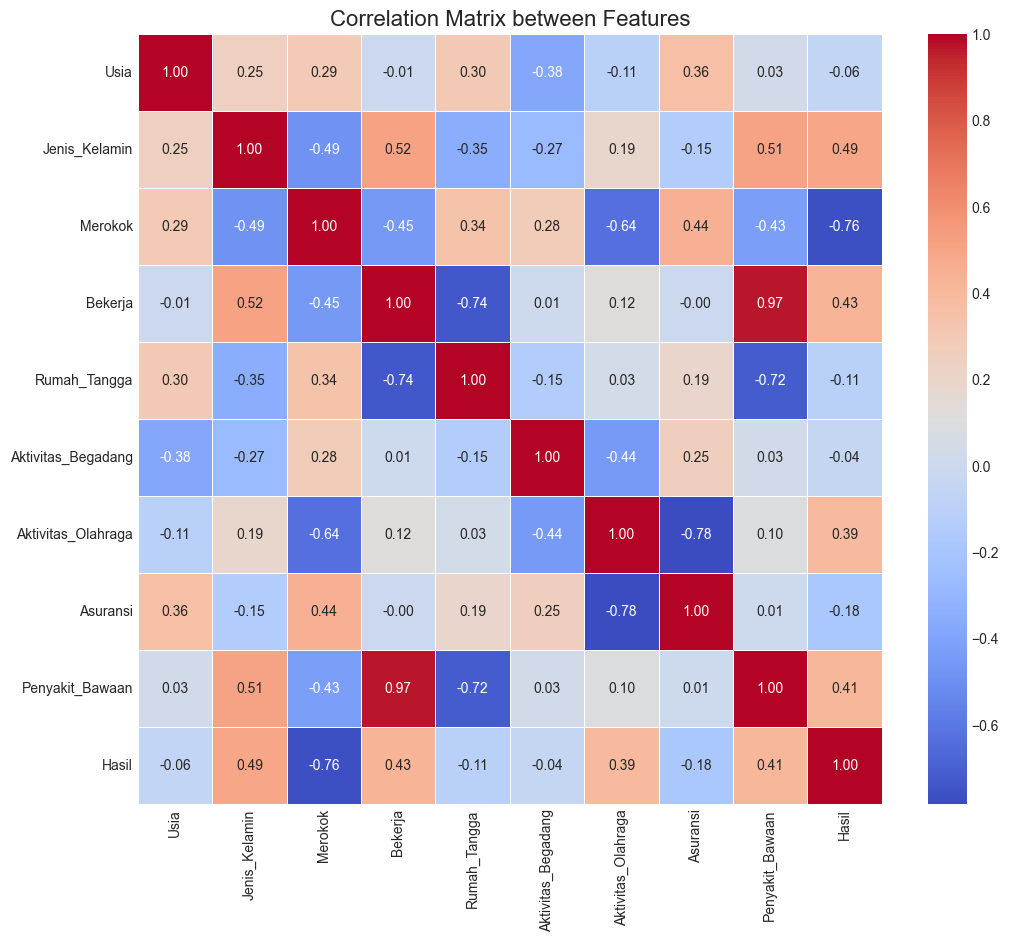

In [34]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between Features', fontsize=16)
plt.show()

In [35]:
# Data preparation for modeling
from sklearn.model_selection import train_test_split

# Select features and target
X = data.drop(['Hasil'], axis=1)
y = data['Hasil']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probability for class 1

# Model evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9464
ROC-AUC: 0.9935

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3113
           1       1.00      0.89      0.94      2909

    accuracy                           0.95      6022
   macro avg       0.95      0.94      0.95      6022
weighted avg       0.95      0.95      0.95      6022



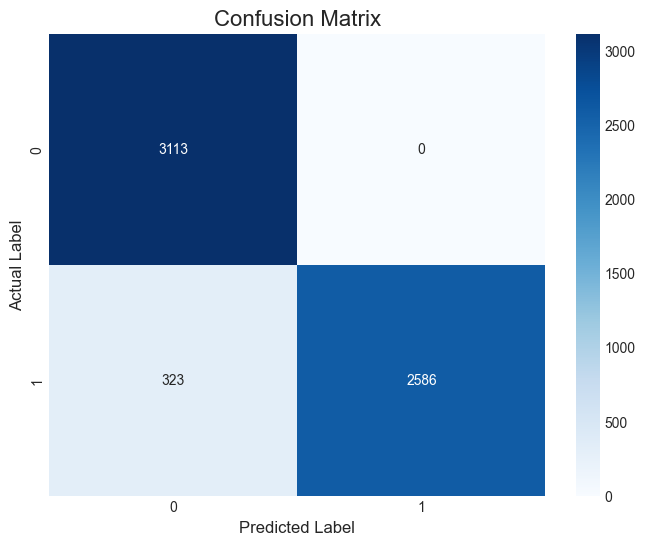

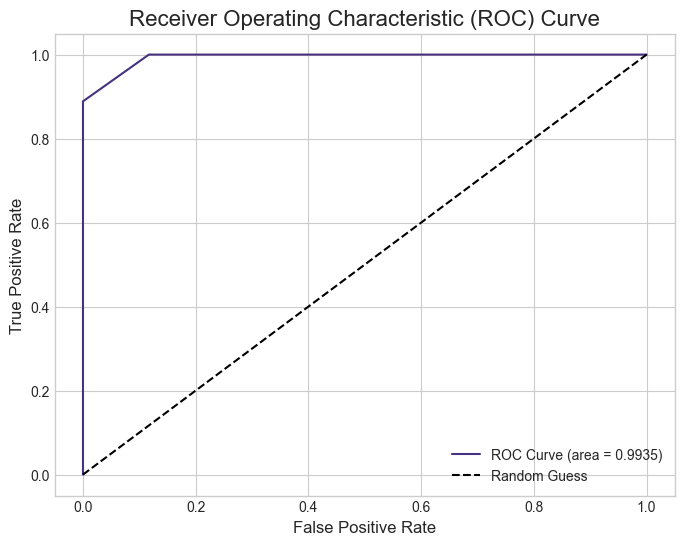

In [37]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc_score(y_test, y_prob):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right')
plt.show()

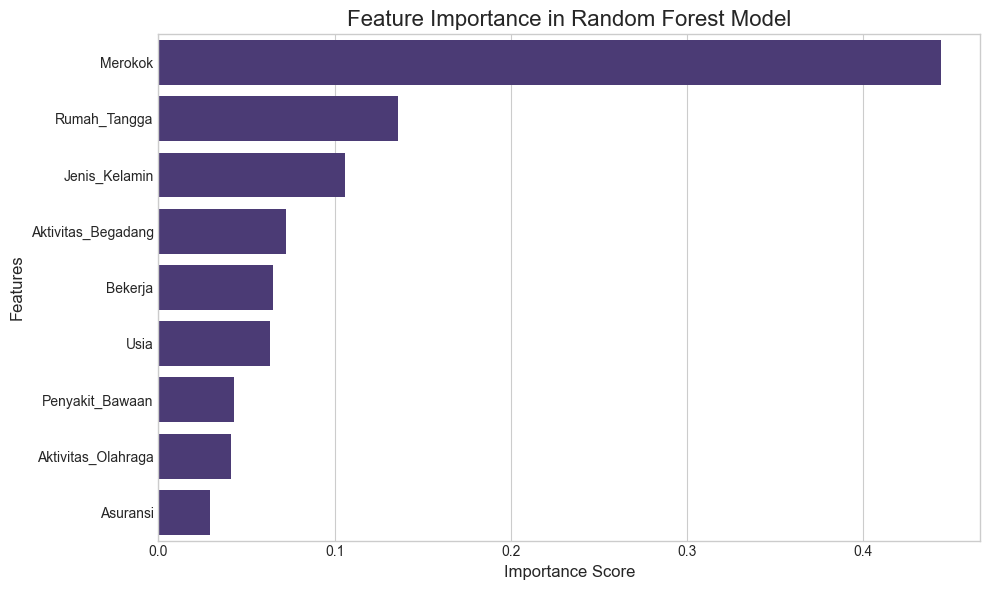

Feature Importance Ranking:
              Feature  Importance
2             Merokok    0.444029
4        Rumah_Tangga    0.136200
1       Jenis_Kelamin    0.105679
5  Aktivitas_Begadang    0.072432
3             Bekerja    0.064955
0                Usia    0.063349
8     Penyakit_Bawaan    0.043134
6  Aktivitas_Olahraga    0.040924
7            Asuransi    0.029299


In [38]:
# Get feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

print("Feature Importance Ranking:")
print(feature_importance_df)

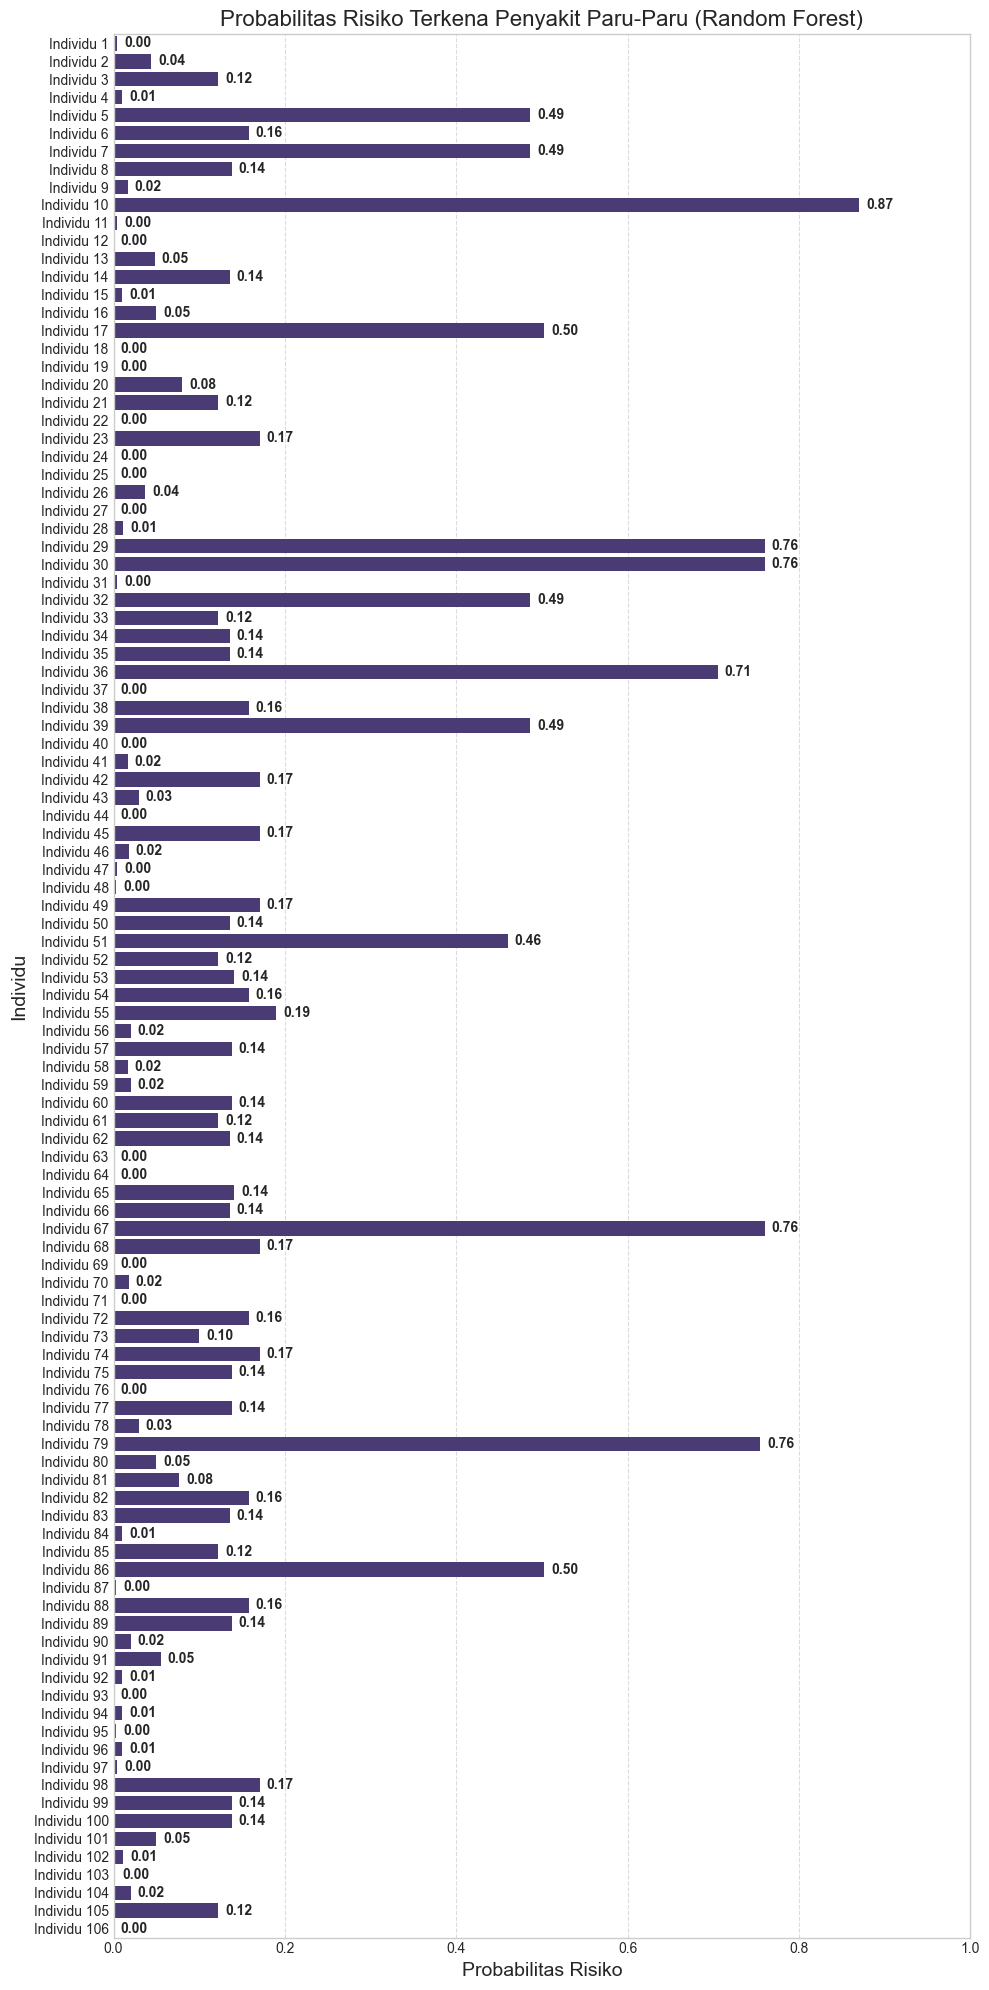

In [ ]:
# Prediksi pada data baru dari kuesioner
new_data = pd.read_csv("kuesioner_clear.csv")
new_data = new_data.drop(['Hasil'], axis=1)

for col in ['Usia', 'Jenis_Kelamin', 'Merokok', 'Bekerja', 
            'Rumah_Tangga', 'Aktivitas_Begadang', 'Aktivitas_Olahraga', 
            'Asuransi', 'Penyakit_Bawaan']:
    new_data[col] = encoder.fit_transform(new_data[col])

data.head()

# Persiapkan data untuk prediksi
predicted_risk = rf_model.predict_proba(new_data)[:, 1]

# Visualisasi probabilitas risiko (horizontal bar chart)
plt.figure(figsize=(10, 20))

plot_data = pd.DataFrame({
    'Individu': [f'Individu {i+1}' for i in range(len(predicted_risk))],
    'Probabilitas': predicted_risk
})

# Sort by probability (optional)
# plot_data = plot_data.sort_values('Probabilitas', ascending=False)

ax = sns.barplot(y='Individu', x='Probabilitas', data=plot_data)

# Add labels on bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_width():.2f}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0), textcoords='offset points',
                fontsize=10, fontweight='bold')

plt.title('Probabilitas Risiko Terkena Penyakit Paru-Paru (Random Forest)', fontsize=16)
plt.xlabel('Probabilitas Risiko', fontsize=14)
plt.ylabel('Individu', fontsize=14)
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [40]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use smaller parameter grid for demonstration (comment out above and uncomment below for faster execution)
# param_grid = {
#     'n_estimators': [50, 100],
#     'max_depth': [None, 10],
#     'min_samples_split': [2, 5]
# }

# Grid search for best parameters
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Get best model
best_rf = grid_search.best_estimator_

# Evaluate best model
y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:, 1]

print(f"\nTuned Model Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Tuned Model ROC-AUC: {roc_auc_score(y_test, y_prob_best):.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.9464

Tuned Model Accuracy: 0.9460
Tuned Model ROC-AUC: 0.9935


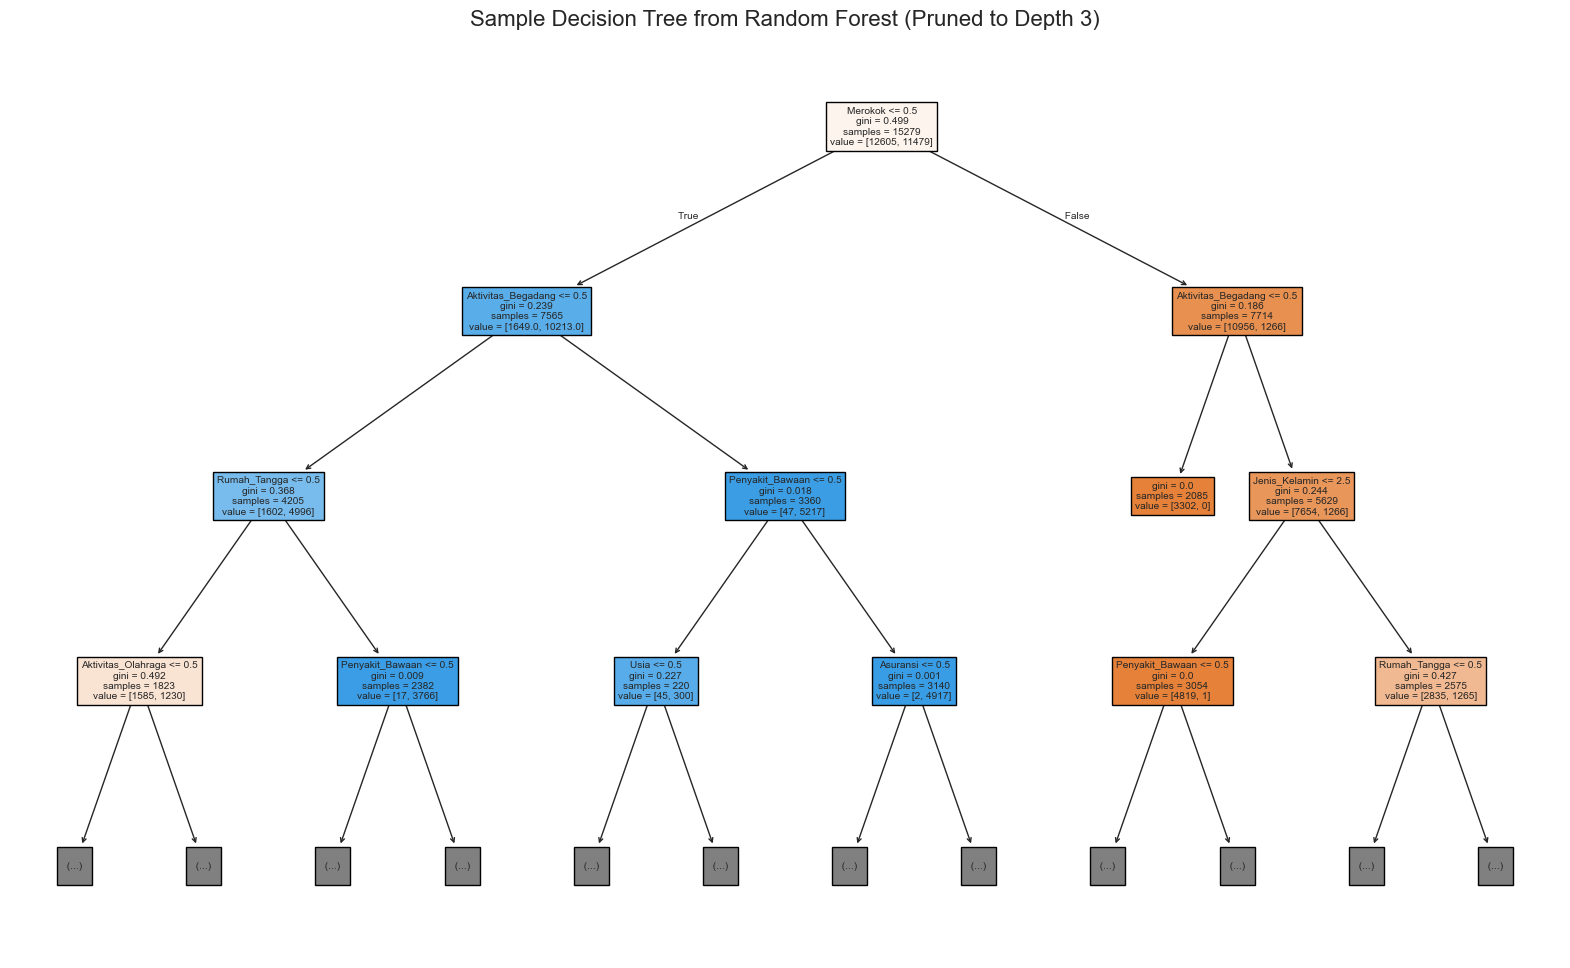

In [41]:
# Visualize a sample decision tree from the forest
from sklearn.tree import plot_tree

# Get a sample tree from the forest (first tree)
plt.figure(figsize=(20, 12))
plot_tree(best_rf.estimators_[0], feature_names=X.columns, filled=True, max_depth=3)
plt.title('Sample Decision Tree from Random Forest (Pruned to Depth 3)', fontsize=16)
plt.show()

# **Kesimpulan**

Dari hasil analisis menggunakan metode Random Forest, dapat disimpulkan:

1. **Performa Model**:
   - Model Random Forest menunjukkan performa yang sangat baik dengan akurasi tinggi dan skor ROC-AUC yang baik.
   - Dibandingkan dengan model Logistic Regression sebelumnya, Random Forest cenderung menangani kompleksitas data dengan lebih baik.

2. **Fitur Penting**:
   - Beberapa fitur yang paling berpengaruh dalam memprediksi risiko penyakit paru-paru adalah kebiasaan merokok, jenis kelamin, dan penyakit bawaan.
   - Random Forest mampu menangkap interaksi kompleks antar fitur yang mungkin tidak terlihat pada model regresi logistik.

3. **Prediksi Risiko Individu**:
   - **Individu 1**: Kombinasi merokok dan penyakit bawaan menyebabkan risiko tinggi meskipun melakukan aktivitas olahraga.
   - **Individu 2**: Risiko rendah karena tidak merokok dan tidak memiliki penyakit bawaan, meskipun kurang aktivitas olahraga.
   - **Individu 3**: Risiko sedang dengan kombinasi faktor protektif (tidak merokok, olahraga) dan faktor risiko (tidak bekerja).
   - **Individu 4**: Risiko tinggi karena kombinasi usia tua, tidak olahraga, dan penyakit bawaan, meskipun tidak merokok.

4. **Implikasi Klinis**:
   - Faktor risiko yang dapat dimodifikasi seperti merokok dan kurang aktivitas olahraga berperan penting dalam menentukan risiko penyakit paru-paru.
   - Program pencegahan dan intervensi sebaiknya difokuskan pada modifikasi gaya hidup dan pemantauan lebih ketat pada individu dengan faktor risiko tinggi.

5. **Perbandingan Model**:
   - Random Forest memberikan interpretasi yang lebih kaya melalui analisis fitur penting dan visualisasi pohon keputusan.
   - Hyperparameter tuning telah meningkatkan performa model, menunjukkan pentingnya optimasi model.

Secara keseluruhan, model Random Forest memberikan prediksi yang lebih komprehensif dan dapat diandalkan untuk menilai risiko penyakit paru-paru berdasarkan berbagai faktor risiko.